In [1]:
from ROOT import TCanvas
from ROOT import TGraph, TGraphErrors
from ROOT import gStyle
from array import array
import numpy as np
import math

xcanvas = 1000
ycanvas = 800

c1 = TCanvas( 'c1', 'Pendulum Amplitude vs. Time', 0, 0, xcanvas, ycanvas )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c2 = TCanvas( 'c2', 'Pendulum Period vs. Time', 0, 0, xcanvas, ycanvas )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.12/06


In [2]:
# Initial Conditions
length = 9.807
method = 2 # 1 = Euler, 2 = Verlet
theta0 = 45
theta = theta0*math.pi/180.0
omega = 0

# Other constants
gravity = 9.807 # gravitional acceleration
g_over_L = gravity/length
time = 0.0
irev = 0.0
tau = 0.001 

Pi = math.pi

In [4]:
Cd = 0.50
area = Pi*0.10*0.10
mass = 1.0
rho = 1.2
air_const = 0.5*Cd*rho*area/mass

norm_omega = math.sqrt(omega*omega)

In [5]:
accel = -g_over_L*math.sin(theta)-air_const*norm_omega*omega*length
theta_old = theta - omega*tau + 0.5*tau*tau*accel
omega_old = (theta-theta_old)/tau
print (accel, theta, theta_old)

-0.7071067811865475 0.7853981633974483 0.7853978098440577


In [6]:
tau = 0.001 # timestep in seconds
nStep = 4000000 # number of steps

t_plot = array('d')
th_plot = array('d')
period = array('d')
period_theory = array('d')
trev = array('d')

In [9]:
tmax = 0.0
for iStep in range(1,nStep+1):
    t_plot.append(time)
    th_plot.append(theta*180/Pi)
    time = time + tau
    norm_omega = math.sqrt(omega*omega)
    accel = -g_over_L*math.sin(theta)-air_const*norm_omega*omega*length
    
    if (method == 1):
        theta_old = theta
        theta = theta + tau*omega
        omega = omega + tau*accel
    else:
        theta_new = 2*theta - theta_old + tau*tau*accel
        omega = (theta_new-theta_old)/(2.0*tau)
        theta_old = theta
        theta = theta_new
        
    if(math.fabs(theta)>tmax):
        tmax=math.fabs(theta)
    
    if (theta*theta_old < 0):
        print ("Turning point at time t = %f" % time)
        t1 = tmax
        if (irev == 0):
            time_old = time
        else:
            period.append(2*(time - time_old))
            period_theory.append(2.0*Pi/math.sqrt(g_over_L)*(1.0+t1*t1/16.0+math.pow(t1,4)*11.0/3072.0+math.pow(t1,6)*173.0/737280.0))
            trev.append(time)
            time_old = time
        irev = irev + 1

Turning point at time t = 1.659000
Turning point at time t = 4.904000
Turning point at time t = 8.132000
Turning point at time t = 11.347000
Turning point at time t = 14.551000
Turning point at time t = 17.748000
Turning point at time t = 20.938000
Turning point at time t = 24.122000
Turning point at time t = 27.302000
Turning point at time t = 30.478000
Turning point at time t = 33.650000
Turning point at time t = 36.820000
Turning point at time t = 39.987000
Turning point at time t = 43.152000
Turning point at time t = 46.315000
Turning point at time t = 49.477000
Turning point at time t = 52.637000
Turning point at time t = 55.795000
Turning point at time t = 58.953000
Turning point at time t = 62.109000
Turning point at time t = 65.265000
Turning point at time t = 68.419000
Turning point at time t = 71.573000
Turning point at time t = 74.726000
Turning point at time t = 77.879000
Turning point at time t = 81.030000
Turning point at time t = 84.182000
Turning point at time t = 87.33

Turning point at time t = 1363.127000
Turning point at time t = 1366.269000
Turning point at time t = 1369.411000
Turning point at time t = 1372.552000
Turning point at time t = 1375.694000
Turning point at time t = 1378.836000
Turning point at time t = 1381.977000
Turning point at time t = 1385.119000
Turning point at time t = 1388.261000
Turning point at time t = 1391.402000
Turning point at time t = 1394.544000
Turning point at time t = 1397.685000
Turning point at time t = 1400.827000
Turning point at time t = 1403.969000
Turning point at time t = 1407.110000
Turning point at time t = 1410.252000
Turning point at time t = 1413.394000
Turning point at time t = 1416.535000
Turning point at time t = 1419.677000
Turning point at time t = 1422.819000
Turning point at time t = 1425.960000
Turning point at time t = 1429.102000
Turning point at time t = 1432.244000
Turning point at time t = 1435.385000
Turning point at time t = 1438.527000
Turning point at time t = 1441.669000
Turning poin

Turning point at time t = 2145.394000
Turning point at time t = 2148.535000
Turning point at time t = 2151.677000
Turning point at time t = 2154.819000
Turning point at time t = 2157.960000
Turning point at time t = 2161.102000
Turning point at time t = 2164.244000
Turning point at time t = 2167.385000
Turning point at time t = 2170.527000
Turning point at time t = 2173.668000
Turning point at time t = 2176.810000
Turning point at time t = 2179.952000
Turning point at time t = 2183.093000
Turning point at time t = 2186.235000
Turning point at time t = 2189.377000
Turning point at time t = 2192.518000
Turning point at time t = 2195.660000
Turning point at time t = 2198.801000
Turning point at time t = 2201.943000
Turning point at time t = 2205.085000
Turning point at time t = 2208.226000
Turning point at time t = 2211.368000
Turning point at time t = 2214.509000
Turning point at time t = 2217.651000
Turning point at time t = 2220.793000
Turning point at time t = 2223.934000
Turning poin

Turning point at time t = 3826.153000
Turning point at time t = 3829.295000
Turning point at time t = 3832.437000
Turning point at time t = 3835.578000
Turning point at time t = 3838.720000
Turning point at time t = 3841.861000
Turning point at time t = 3845.003000
Turning point at time t = 3848.145000
Turning point at time t = 3851.286000
Turning point at time t = 3854.428000
Turning point at time t = 3857.569000
Turning point at time t = 3860.711000
Turning point at time t = 3863.853000
Turning point at time t = 3866.994000
Turning point at time t = 3870.136000
Turning point at time t = 3873.277000
Turning point at time t = 3876.419000
Turning point at time t = 3879.561000
Turning point at time t = 3882.702000
Turning point at time t = 3885.844000
Turning point at time t = 3888.985000
Turning point at time t = 3892.127000
Turning point at time t = 3895.269000
Turning point at time t = 3898.410000
Turning point at time t = 3901.552000
Turning point at time t = 3904.693000
Turning poin

In [10]:
nPeriod = int(irev - 1)
print (nPeriod)

1272


In [11]:
gr = TGraph(nStep,t_plot,th_plot)
grr = TGraph(nPeriod,trev,period)
grrr = TGraph(nPeriod,trev,period_theory)

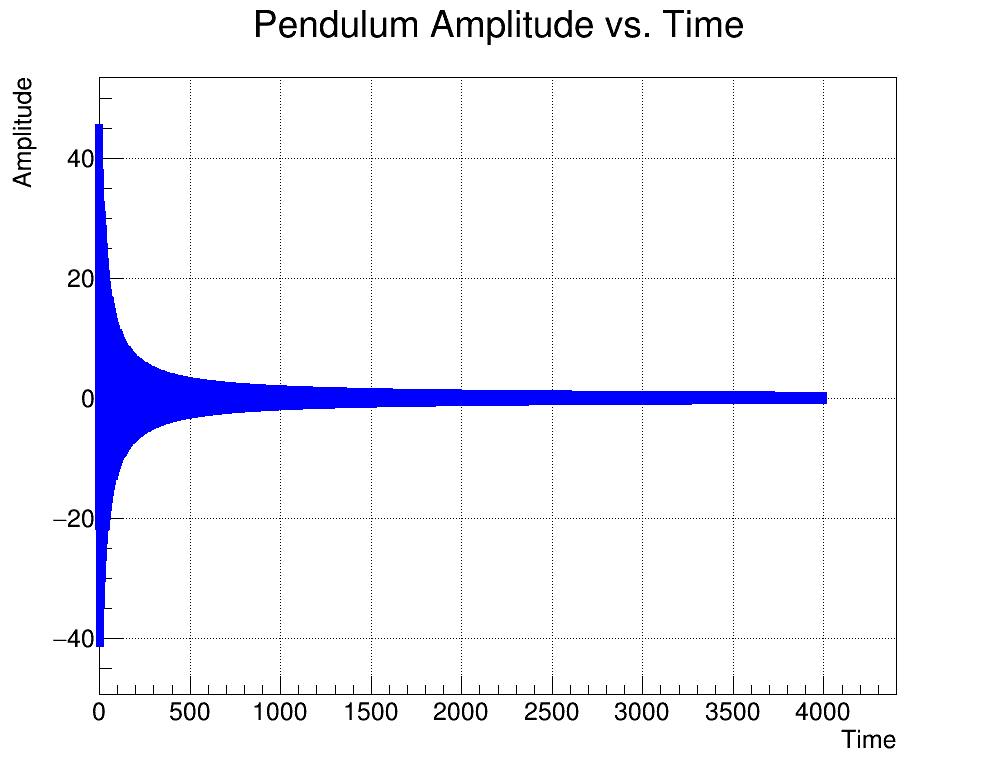

In [12]:
gr.SetMarkerColor(4)
grr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
grrr.SetMarkerStyle(23)
grr.SetMarkerStyle(22)
gr.SetTitle("Pendulum Amplitude vs. Time")
gr.GetXaxis().SetTitle("Time")
gr.GetYaxis().SetTitle("Amplitude")
grr.SetTitle("Pendulum Period vs. Time")
grr.GetXaxis().SetTitle("Time")
grr.GetYaxis().SetTitle("Period")

c1.cd()
gr.Draw("AP")
c1.Draw()

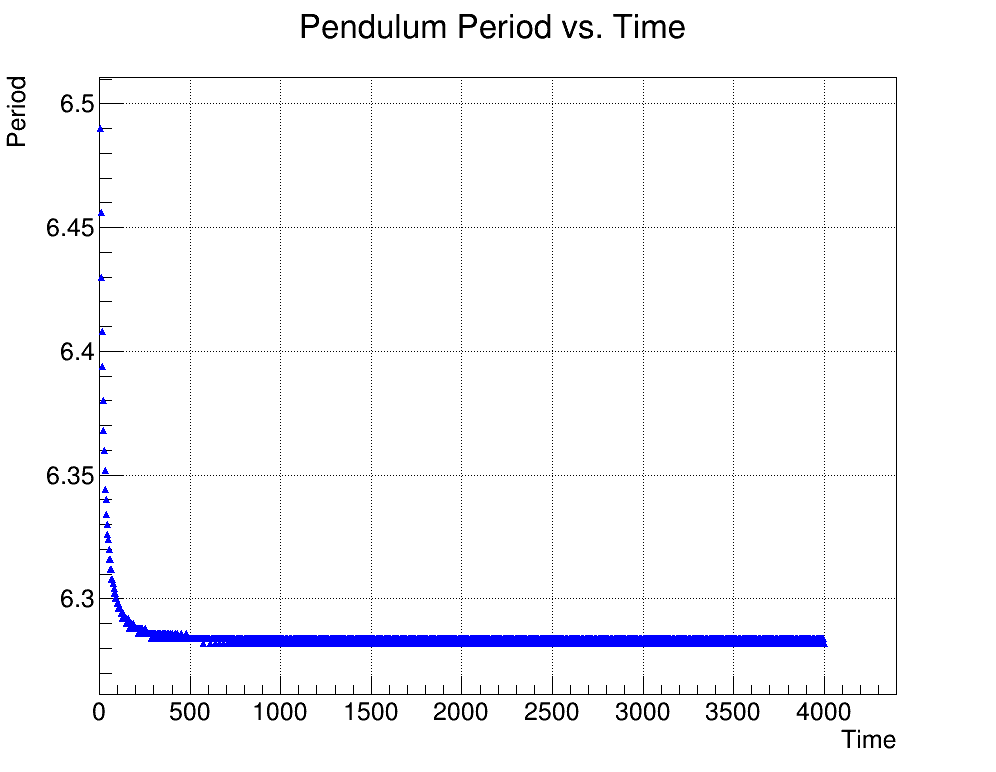

In [13]:
c2.cd()
grr.Draw("AP")
grrr.Draw("P")
c2.Draw()

In [14]:
AvePeriod = 0.0
ErrorBar = 0.0
for i in range(1,nPeriod+1):
    AvePeriod = AvePeriod + period[i-1]
AvePeriod = AvePeriod/nPeriod
for i in range(1,nPeriod+1):
    ErrorBar = ErrorBar + (period[i-1]-AvePeriod)*(period[i-1]-AvePeriod)
ErrorBar = math.sqrt(ErrorBar/(nPeriod*(nPeriod-1)))
print("Average Period = %f +/- %f" % (AvePeriod,ErrorBar))
    

Average Period = 6.285035 +/- 0.000328


In [15]:
t0=theta0*Pi/180.0
t_infinite = 2.0*Pi/math.sqrt(g_over_L)*(1.0+t0*t0/16.0+math.pow(t0,4)*11.0/3072.0+math.pow(t0,6)*173.0/737280.0)
error_infinite = 2.0*Pi/math.sqrt(g_over_L)*math.pow(t0,8)*22931.0/1321205760.0

In [16]:
print("Infinite series prediction = %f +/- %f" % (t_infinite,error_infinite))

Infinite series prediction = 6.534329 +/- 0.000016


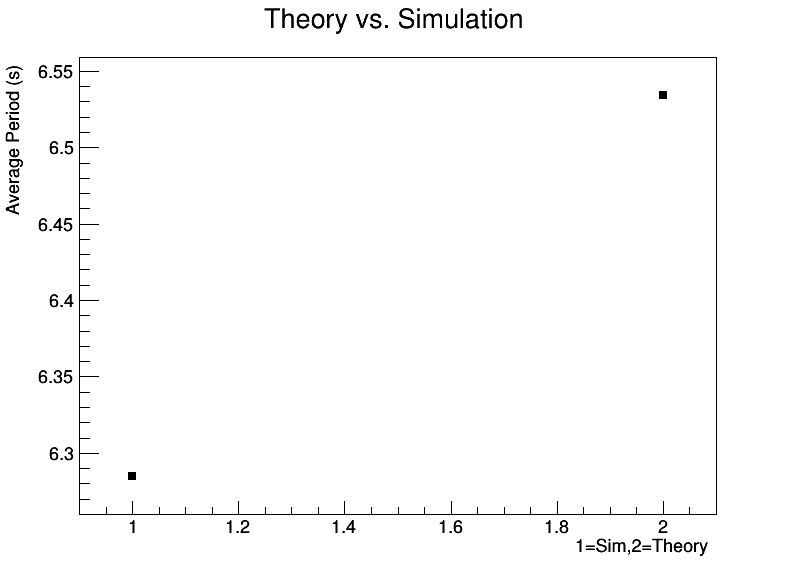

In [17]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')
npoints = 2
x.append(1)
x.append(2)
ex.append(0)
ex.append(0)
y.append(AvePeriod)
y.append(t_infinite)
ey.append(ErrorBar)
ey.append(error_infinite)

c3 = TCanvas("c3","c3",100,0,800,600)
gr3 = TGraphErrors(npoints,x,y,ex,ey)
gr3.SetMarkerStyle(21)
gr3.SetTitle("Theory vs. Simulation")
gr3.GetXaxis().SetTitle("1=Sim,2=Theory")
gr3.GetYaxis().SetTitle("Average Period (s)")
gr3.Draw("AP")
c3.Draw()